# First attempts

In [55]:
import os
import os.path
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits 
from astropy.table import Table
import pandas as pd

def redshift(loc):
    z = fits.open(loc)
    val = z[2].data
    z.close()
    return val['Z'][0]

local_dir="/home/colgoat/Jupyter/Entorno/Spec"
file="DR14snrL.txt"
local_file = os.path.join(local_dir,file)
df = pd.read_csv(local_file,delim_whitespace=True, skiprows=0,dtype = {'id':str})
catlist = df['id']

direc = "/home/colgoat/Jupyter/Entorno/Spec/"
si_list = []
no_list = []

for a in range(len(catlist)):
    if (os.path.isfile(direc+catlist[a]) == True):
        si_list.append(direc+catlist[a])
    else:
        no_list.append(direc+catlist[a])

np.savetxt('/home/colgoat/Jupyter/Entorno/Spec/found.txt',si_list, fmt='%s', delimiter=',')
np.savetxt('/home/colgoat/Jupyter/Entorno/Spec/not_found.txt',no_list, fmt='%s', delimiter=',')

limits = [1050, 1093.3, 1136.6, 1180]
snr = [0,0,0]
SNR_F = []
        
for a in range(len(si_list)):
    file = fits.open(si_list[a])
    spectra = file[1].data
    for b in range(3):
        wave_cut=((10**spectra['loglam'])>(1. + redshift(si_list[a])) * limits[b]) & ((10**spectra['loglam'])<(1. + redshift(si_list[a])) * limits[b+1])
        forest = spectra[wave_cut]
        raw = forest['flux'] * np.sqrt(forest['ivar'])
        snr[b] = np.mean(raw)
    file.close()
    SNR_F.append(si_list[a]+" Z="+str(redshift(si_list[a]))+" SNR(F): "+str(snr[0])+" "+str(snr[1])+" "+str(snr[2]))
    snr = [0,0,0]    

SNR_F
    
    

/home/colgoat/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/colgoat/.local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


['/home/colgoat/Jupyter/Entorno/Spec/4289/spec-4289-55856-0532.fits Z=2.39217 SNR(F): 0.90047354 1.341343 1.8761525',
 '/home/colgoat/Jupyter/Entorno/Spec/4629/spec-4629-55630-0536.fits Z=3.0992098 SNR(F): 2.986251 3.203494 3.3270519',
 '/home/colgoat/Jupyter/Entorno/Spec/5006/spec-5006-55706-0452.fits Z=2.3611636 SNR(F): 0.9722188 1.2114176 1.9686958',
 '/home/colgoat/Jupyter/Entorno/Spec/5448/spec-5448-56013-0144.fits Z=2.305159 SNR(F): 1.9284124 2.9875946 4.6245346',
 '/home/colgoat/Jupyter/Entorno/Spec/5801/spec-5801-56328-0944.fits Z=3.1290314 SNR(F): 2.843162 2.3872023 2.405431',
 '/home/colgoat/Jupyter/Entorno/Spec/6138/spec-6138-56598-0467.fits Z=2.2299812 SNR(F): nan 3.719985 6.631879',
 '/home/colgoat/Jupyter/Entorno/Spec/6182/spec-6182-56190-0718.fits Z=2.9955041 SNR(F): 5.6637664 5.7456937 4.000906',
 '/home/colgoat/Jupyter/Entorno/Spec/6253/spec-6253-56574-0924.fits Z=2.3892016 SNR(F): 0.5887586 0.8315658 1.779615',
 '/home/colgoat/Jupyter/Entorno/Spec/6431/spec-6431-56311

# Calculated

In [48]:
import os
import os.path
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits 
from astropy.table import Table
import pandas as pd

#nuevo = fits.open("/home/colgoat/TFPS/SNRForestExctDR14.fits")
catalog = Table.read("/home/colgoat/TFPS/SNRForestExctDR14.fits")

w = (catalog['z_qso']>=2.1) & (catalog['ID']>0)

reduced_cat=catalog[w]
cat_by_ID=reduced_cat.group_by('ID')
small_cat=cat_by_ID[0:168045]
small_cat


ID,plate,mjd,fiber,z_qso,z_fst(A),z_fst(B),z_fst(C),SNR_fst(A),SNR_fst(B),SNR_fst(C),pxlon(A),pxlon(B),pxlon(C)
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
20935572,7169,56628,130,3.9245136,3.3407423,3.5160778,3.691479,3.5978441,2.2960804,2.240137,176,168,163
20937010,7169,56628,162,2.4205363,2.0148382,2.1369796,2.2588131,1.27289,2.1114523,3.0693185,176,169,162
20953940,7169,56628,323,2.3754535,1.9843882,2.0953636,2.2159536,2.7958958,4.4369555,5.4902225,148,169,163
20968740,7169,56628,403,3.2385573,2.7360582,2.8869746,3.0384042,3.422123,3.10844,3.3440466,175,169,163
20974730,7168,56625,44,3.0012484,2.5266633,2.6695404,2.8120577,6.233497,5.4098277,5.188599,176,169,162
20981686,7168,56625,102,2.319419,1.9586275,2.0441172,2.1623487,1.548991,2.1456432,4.1762443,79,168,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553181827,6966,56748,592,2.794528,2.3443651,2.4794586,2.6150122,1.8287737,1.8322306,2.405217,175,169,163
553191513,6966,56748,628,3.2595193,2.7541676,2.9058151,3.0579786,9.984613,9.475096,8.386737,175,169,163


In [39]:
super_cat=Table.read("/home/colgoat/Jupyter/DR14Q_v4_4.fits")
w=(super_cat['THING_ID']>0) & (super_cat['Z']>=2.1) & (super_cat['RA']!=super_cat['DEC'])\
 & (super_cat['RA']>0) & (super_cat['MJD']< 56870) & (super_cat['BI_CIV']<=0)


super_cat
filt_supercat=super_cat[w]
cat_by_TI=filt_supercat.group_by('THING_ID')
small_supercat=cat_by_TI[0:168045]


small_supercat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
001550.63-105421.3,3.9609720447383534,-10.90592373671505,20935572,7169,56628,130,BOSS,3.91,0.0,VI,3.910000085830689,3.924513578414917,0.0006429765489883723,0,3.8881477999999996,-1.0,-1.0,2199023271936,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.1254637986421585 .. 16.55965232849121,12.678911209106445 .. 0.5674679279327393,24.16314125061035 .. 19.450210571289062,0.9937875270843506 .. 0.08669116348028183,-27.645222,0.16184712946414948 .. 0.04822197183966637,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,-0.0991942435503006,1054.5289006035107,-0.03879263997077942,15.740846534586115,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,16.407,0.07400000000000001,14.699999809265137,0.8959,15.94,0.17,6.400000095367432,0.9701,12.088,0.454,2.4000000953674316,0.858,8.146,0.07400000000000001,1.899999976158142,0.8638,0000,ABCU,0.047154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0,-1.0,-1.0
001501.01-105656.1,3.7542214874652733,-10.948936701334851,20937010,7169,56628,162,BOSS,2.412,0.0,VI,2.4119999408721924,2.4205362796783447,0.0003491138049867004,0,2.4155896,-1.0,-1.0,3298535424000,0,1024,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.9811794757843018 .. 6.018215179443359,8.412131309509277 .. 0.6568734049797058,21.752309799194336 .. 20.535276412963867,0.18709099292755127 .. 0.21615496277809143,-25.512043,0.16155345737934113 .. 0.04813447222113609,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.06376922130584718,175.01824343751977,-0.082896888256073,333.0062917346512,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.088,0.133,8.100000381469727,1.047,16.037,0.201,5.400000095367432,1.091,12.287,--,0.6000000238418579,0.9918,8.904,0.133,-1.7000000476837158,0.8536,0000,BBUU,0.44197,0

In [37]:
match = 0
no_match = 0

for a in range(len(small_supercat)):
    if (small_supercat['THING_ID'][a]==small_cat['ID'][a]):
        match = 1 + match
    else:
        no_match = 1 + no_match
        
print("THING_ID   ","Match: ",match," no Match: ",no_match)

match = 0
no_match = 0


for a in range(len(small_supercat)):
    if (small_supercat['PLATE'][a]==small_cat['plate'][a]):
        match = 1 + match
    else:
        no_match = 1 + no_match
        
print("PLATE      ","Match: ",match," no Match: ",no_match)

match = 0
no_match = 0


for a in range(len(small_supercat)):
    if (small_supercat['MJD'][a]==small_cat['mjd'][a]):
        match = 1 + match
    else:
        no_match = 1 + no_match
        
print("MJD        ","Match: ",match," no Match: ",no_match)

match = 0
no_match = 0


for a in range(len(small_supercat)):
    if (small_supercat['FIBERID'][a]==small_cat['fiber'][a]):
        match = 1 + match
    else:
        no_match = 1 + no_match
        
print("FIBER      ","Match: ",match," no Match: ",no_match)
        

match = 0
no_match = 0


for a in range(len(small_supercat)):
    if (round(small_supercat['Z'][a],3)==round(small_cat['z_qso'][a],3)):
        match = 1 + match
    else:
        no_match = 1 + no_match
        
print("Z DEF      ","Match: ",match," no Match: ",no_match)

match = 0
no_match = 0


for a in range(len(small_supercat)):
    if (round(small_supercat['Z_VI'][a],3)==round(small_cat['z_qso'][a],3)):
        match = 1 + match
    else:
        no_match = 1 + no_match
        
print("Z VIS      ","Match: ",match," no Match: ",no_match)

match = 0
no_match = 0


for a in range(len(small_supercat)):
    if (round(small_supercat['Z_PIPE'][a],1)==round(small_cat['z_qso'][a],1)):
        match = 1 + match
    else:
        no_match = 1 + no_match
        
print("Z PIPE     ","Match: ",match," no Match: ",no_match)



match = 0
no_match = 0


for a in range(len(small_supercat)):
    if (round(small_supercat['Z_PCA'][a],3)==round(small_cat['z_qso'][a],4)):
        match = 1 + match
    else:
        no_match = 1 + no_match
        
print("Z PCA      ","Match: ",match," no Match: ",no_match)
        
        

THING_ID    Match:  168045  no Match:  0
PLATE       Match:  168045  no Match:  0
MJD         Match:  168045  no Match:  0
FIBER       Match:  168045  no Match:  0
Z DEF       Match:  61473  no Match:  106572
Z VIS       Match:  61448  no Match:  106597
Z PIPE      Match:  168045  no Match:  0
Z PCA       Match:  730  no Match:  167315


In [121]:
w

masked_array(data=[ True,  True,  True, ...,  True,  True,  True],
             mask=False,
       fill_value=True)

In [50]:
catalog = Table.read("/home/colgoat/TFPS/SNRForestExctDR14.fits")

w = (catalog['z_qso']>=2.1) & (catalog['ID']>0)

reduced_cat=catalog[w]
cat_by_ID=reduced_cat.group_by('ID')
small_cat=cat_by_ID[0:168045]
small_cat


ID,plate,mjd,fiber,z_qso,z_fst(A),z_fst(B),z_fst(C),SNR_fst(A),SNR_fst(B),SNR_fst(C),pxlon(A),pxlon(B),pxlon(C)
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
20935572,7169,56628,130,3.9245136,3.3407423,3.5160778,3.691479,3.5978441,2.2960804,2.240137,176,168,163
20937010,7169,56628,162,2.4205363,2.0148382,2.1369796,2.2588131,1.27289,2.1114523,3.0693185,176,169,162
20953940,7169,56628,323,2.3754535,1.9843882,2.0953636,2.2159536,2.7958958,4.4369555,5.4902225,148,169,163
20968740,7169,56628,403,3.2385573,2.7360582,2.8869746,3.0384042,3.422123,3.10844,3.3440466,175,169,163
20974730,7168,56625,44,3.0012484,2.5266633,2.6695404,2.8120577,6.233497,5.4098277,5.188599,176,169,162
20981686,7168,56625,102,2.319419,1.9586275,2.0441172,2.1623487,1.548991,2.1456432,4.1762443,79,168,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553181827,6966,56748,592,2.794528,2.3443651,2.4794586,2.6150122,1.8287737,1.8322306,2.405217,175,169,163
553191513,6966,56748,628,3.2595193,2.7541676,2.9058151,3.0579786,9.984613,9.475096,8.386737,175,169,163


In [58]:
z_for = []

z_for.append('ID'+" "+ 'plate'+" "+ 'mjd'+" "+ \
'fiber'+" "+ 'z_qso'+" "+ 'z_fst'+" "+ \
'SNR_fst'+" "+ 'pxlon'+" "+ "Part")



for a in range(len(small_cat)):
    if (small_cat['z_fst(A)'][a]>=0 and small_cat['z_qso'][a]>=2.1):
        z_for.append(str(small_cat['ID'][a])+" "+ str(small_cat['plate'][a])+" "+ str(small_cat['mjd'][a])+" "+ \
        str(small_cat['fiber'][a])+" "+ str(small_cat['z_qso'][a])+" "+ str(small_cat['z_fst(A)'][a])+" "+ \
        str(small_cat['SNR_fst(A)'][a])+" "+ str(small_cat['pxlon(A)'][a])+" "+ "A")        
                                          
for b in range(len(small_cat)):
    if (small_cat['z_fst(B)'][b]>=0 and small_cat['z_qso'][b]>=2.1):
        z_for.append(str(small_cat['ID'][b])+" "+ str(small_cat['plate'][b])+" "+ str(small_cat['mjd'][b])+" "+ \
        str(small_cat['fiber'][b])+" "+ str(small_cat['z_qso'][b])+" "+ str(small_cat['z_fst(B)'][b])+" "+ \
        str(small_cat['SNR_fst(B)'][b])+" "+ str(small_cat['pxlon(B)'][b])+" "+ "B") 
        
for c in range(len(small_cat)):
    if (small_cat['z_fst(C)'][c]>=0 and small_cat['z_qso'][c]>=2.1):
        z_for.append(str(small_cat['ID'][c])+" "+ str(small_cat['plate'][c])+" "+ str(small_cat['mjd'][c])+" "+ \
        str(small_cat['fiber'][c])+" "+ str(small_cat['z_qso'][c])+" "+ str(small_cat['z_fst(C)'][c])+" "+ \
        str(small_cat['SNR_fst(C)'][c])+" "+ str(small_cat['pxlon(C)'][c])+" "+ "C") 
        

#463349 no filter
#463110 filter
len(z_for)

463111

In [59]:
np.savetxt('/home/colgoat/Jupyter/DR14indForest_extrac.txt',z_for, fmt='%s', delimiter=',')

In [61]:
SNR_process = pd.read_csv('/home/colgoat/Jupyter/DR14indForest_extrac.txt',delim_whitespace=True, \
skiprows=1, names=['ID','plate','mjd','fiber','z_qso','z_fst','SNR_fst',\
'pxlon','PART'])
    
TABLA = Table.from_pandas(SNR_process)
TABLA.write("/home/colgoat/Jupyter/DR14indForest_extrac.fits", overwrite = True)

In [62]:
bosques = Table.read("/home/colgoat/Jupyter/DR14indForest_extrac.fits")
bosques

ID,plate,mjd,fiber,z_qso,z_fst,SNR_fst,pxlon,PART
int64,int64,int64,int64,float64,float64,float64,int64,bytes1
20935572,7169,56628,130,3.9245136,3.3407423,3.5978441,176,A
20937010,7169,56628,162,2.4205363,2.0148382,1.27289,176,A
20953940,7169,56628,323,2.3754535,1.9843882,2.7958958,148,A
20968740,7169,56628,403,3.2385573,2.7360582,3.422123,175,A
20974730,7168,56625,44,3.0012484,2.5266633,6.233497,176,A
20981686,7168,56625,102,2.319419,1.9586275,1.548991,79,A
...,...,...,...,...,...,...,...,...
553181827,6966,56748,592,2.794528,2.6150122,2.405217,163,C
553191513,6966,56748,628,3.2595193,3.0579786,8.386737,163,C


In [81]:
ac = 0
for_z = []
for_id = []

for x in range(len(bosques)):
    if(bosques['z_fst'][x]>=2.1 and bosques['z_fst'][x]<2.3): #2.2
        if(bosques['SNR_fst'][x]>=4.1 and bosques['pxlon'][x]>=75):
            ac = ac + 1
            for_z.append(bosques['z_fst'][x])
            for_id.append(bosques['ID'][x])
            
            
    if(bosques['z_fst'][x]>=2.3 and bosques['z_fst'][x]<2.5): #2.4
        if(bosques['SNR_fst'][x]>=3.9 and bosques['pxlon'][x]>=75):
            ac = ac + 1
            for_z.append(bosques['z_fst'][x])
            for_id.append(bosques['ID'][x])

    if(bosques['z_fst'][x]>=2.5 and bosques['z_fst'][x]<2.7): #2.6
        if(bosques['SNR_fst'][x]>=3.6 and bosques['pxlon'][x]>=75):
            ac = ac + 1
            for_z.append(bosques['z_fst'][x])
            for_id.append(bosques['ID'][x])
            
    if(bosques['z_fst'][x]>=2.7 and bosques['z_fst'][x]<2.9): #2.8
        if(bosques['SNR_fst'][x]>=3.2 and bosques['pxlon'][x]>=75):
            ac = ac + 1
            for_z.append(bosques['z_fst'][x])
            for_id.append(bosques['ID'][x])
            
    if(bosques['z_fst'][x]>=2.9 and bosques['z_fst'][x]<3.1): #3.0
        if(bosques['SNR_fst'][x]>=2.9 and bosques['pxlon'][x]>=75):
            ac = ac + 1
            for_z.append(bosques['z_fst'][x])
            for_id.append(bosques['ID'][x])
            
    if(bosques['z_fst'][x]>=3.1 and bosques['z_fst'][x]<3.3): #3.2
        if(bosques['SNR_fst'][x]>=2.6 and bosques['pxlon'][x]>=75):
            ac = ac + 1
            for_z.append(bosques['z_fst'][x])
            for_id.append(bosques['ID'][x])
            
    if(bosques['z_fst'][x]>=3.3 and bosques['z_fst'][x]<3.5): #3.4
        if(bosques['SNR_fst'][x]>=2.2 and bosques['pxlon'][x]>=75):
            ac = ac + 1
            for_z.append(bosques['z_fst'][x])
            for_id.append(bosques['ID'][x])
            
    if(bosques['z_fst'][x]>=3.5): #3.6 to 4.6
        if(bosques['SNR_fst'][x]>=2.0 and bosques['pxlon'][x]>=75):
            ac = ac + 1
            for_z.append(bosques['z_fst'][x])
            for_id.append(bosques['ID'][x])
            
            
print(ac)

119499


In [91]:

NAME = np.unique(for_id)
len(NAME)


NAME2 = np.unique(small_supercat['THING_ID'])

np.savetxt('/home/colgoat/Jupyter/1tmpDR14specNAME.txt',NAME, fmt='%s', delimiter=',')
np.savetxt('/home/colgoat/Jupyter/2tmpDR14specNAME.txt',NAME2, fmt='%s', delimiter=',')


In [141]:

df = pd.read_csv('/home/colgoat/Jupyter/3tmpDR14specNAME.txt',delim_whitespace=True, skiprows=0,dtype = {'bool_value':bool})
catlist = df['bool_value']

n = np.ma.masked_array(catlist)

#len(qso)
cuas = small_supercat[n]
#cuasares


cuas
#len(small_supercat)

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
001550.63-105421.3,3.9609720447383534,-10.90592373671505,20935572,7169,56628,130,BOSS,3.91,0.0,VI,3.910000085830689,3.924513578414917,0.0006429765489883723,0,3.8881477999999996,-1.0,-1.0,2199023271936,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.1254637986421585 .. 16.55965232849121,12.678911209106445 .. 0.5674679279327393,24.16314125061035 .. 19.450210571289062,0.9937875270843506 .. 0.08669116348028183,-27.645222,0.16184712946414948 .. 0.04822197183966637,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,-0.0991942435503006,1054.5289006035107,-0.03879263997077942,15.740846534586115,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,16.407,0.07400000000000001,14.699999809265137,0.8959,15.94,0.17,6.400000095367432,0.9701,12.088,0.454,2.4000000953674316,0.858,8.146,0.07400000000000001,1.899999976158142,0.8638,0000,ABCU,0.047154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0,-1.0,-1.0
001228.64-105405.3,3.1193523788890047,-10.901491801146324,20953940,7169,56628,323,BOSS,2.377,0.0,VI,2.377000093460083,2.375453472137451,0.00019968136621173463,0,2.3744774,2.375466,2.375466,3298535424000,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,6.0398173332214355 .. 15.396869659423828,6.370800971984863 .. 0.53863126039505,20.546857833862305 .. 19.528919219970703,0.07114384323358536 .. 0.09564206004142761,-26.465464,0.14860403537750244 .. 0.044276222586631775,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.08533362299203873,206.4563748349538,0.17434516549110413,8.131628219202646,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,,,--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0,-1.0,-1.0
001055.56-105255.5,2.7315387185268643,-10.882094996372542,

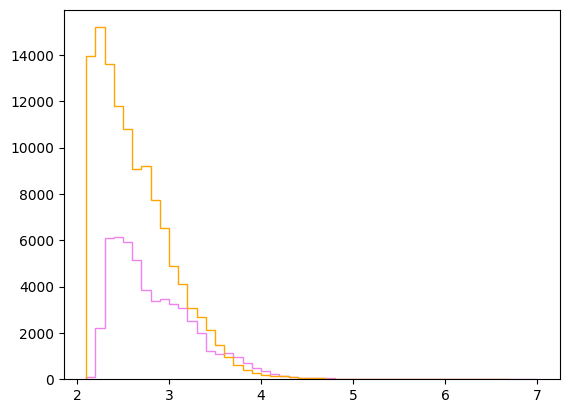

6.605184

In [142]:
plt.hist(cuas['Z'], bins=np.arange(min(cuas['Z']), max(cuas['Z']) + 0.1, 0.1) \
, ec="violet", facecolor="none", histtype='step')
plt.hist(for_z, bins=np.arange(min(for_z), max(for_z) + 0.1, 0.1),ec="orange", facecolor="none", histtype='step')
plt.show()


max(for_z)